# Lamin-A/C (LMNA)

The [LMNA gene](https://omim.org/entry/150330#geneMap) encodes for lamin A and lamin C, which together (with the addition of lamin B) create the nuclear lamina, which is essential to determining the nuclear size and shape from underneath the inner nuclear membrane. They are also found to be essential for nuclear growth, DNA replication, and apoptosis ([Gruenbaum et al. (2000)](https://pubmed.ncbi.nlm.nih.gov/10806082/)). 

There are 11 different syndromes that are associated with variants on LMNA. The five that we focus on in this analysis are all autosomal dominant.
1) [Cardiomyopathy, dilated, 1A](https://omim.org/clinicalSynopsis/115200) is characterized as having heart issues such as atrial fibrillation/flutter, congestive heart failure, ventricular arrhythmia, and congestive cardiomyopathy, along with Adams-Stokes attacks.
2) [Emery-Dreifuss muscular dystrophy 2, autosomal dominant](https://omim.org/clinicalSynopsis/181350) is characterized as having heart issues including dialated cardiomyopathy and cardiac arrhythmias, skeletal issues, and early onset muscle issues like humeroperoneal and distal lower limb muscle weakness or atrophy, and limb-girdle muscle weakness. 
3) [LMNA-related congenital muscular dystrophy](https://omim.org/clinicalSynopsis/613205) is typically diagnosed prenatally or in early infancy. It's characterized as having delayed motor development, decreased fetal movement, muscle weakness, severe hypotonia, rigid spine, floppy neck, and respiratory insufficiency. 
4) [Hutchinson-Gilford progeria](https://omim.org/clinicalSynopsis/176670) is usually diagnosed within the first two years of life and has a median life expectancy of 13 years. It is characterized as someone having short stature, prominent scalp veins, conductive hearing loss, multiple physical abnormalities, angina, myocardial infarction, elevated blood pressue, multiple skeletal issues, multiple skin issues, lipodystrophy, muscular atrophy, elevated platelet count, and increased risk of stroke.
5) [Lipodystrophy, familial partial, type 2](https://omim.org/clinicalSynopsis/151660) begins to show symptoms during puberty. It's characterized primarily through soft muscle tissue issues like partial lipodystrophy, loss of different adipose tissues, muscular hypertrophy, myalgia, and increased intramuscular/instraabdominal fat, along with xanthomata, prominent veins, hypertension, atherosclerosis, hepatomegaly, pancreatitis, and increased adipose tissue on face and neck. 


Several previous publications have reported candidate genotype-phenotype correlations on the LMNA gene.

[Captur et al. (2018)](https://openheart.bmj.com/content/openhrt/5/2/e000915.full.pdf) stated that: 

> "There was an association between more adverse cardiac phenotype and LMNA DNA location upstream of the NLS (p=0.014, OR 2.38, 95% CI 1.19 to 4.80). HCA repeated for mutations relative to the tail domain similarly showed an association of more adverse cardiac phenotype with mutations upstream of the tail (p=0.013, OR 2.34, 95% CI 1.18 to 4.60) compared with those in the tail."

[Hegele (2005)](https://onlinelibrary.wiley.com/doi/epdf/10.1111/j.1399-0004.2005.00447.x) stated that:

> "The odds ratio (OR) for a general association between an HCA class 1 laminopathy and amutation upstream of the NLS of LMNA was 8.4(95% confidence interval (CI) = 2.9 – 24.7). When only missense mutations were considered, this ORwas also 8.4 (95% CI = 2.8 – 25.1, p < 0.0001)."

> The patients carrying the R644C variant demonstrated an atypical FPLD2 phenotype, while the rest of the patients demonstrated the classic FPLD2 phenotype.

Therefore, we tested missense vs other variants and variants upstream of NLS vs those downstream. For upstream variants, we tested both for overall phenotypes along with the cardiac phenotype severity. 


# Imports 

In [1]:
import hpotk
import gpsea

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2024-08-13')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {gpsea.__version__}")


Loaded HPO v2024-08-13
Using genophenocorr version 0.7.1.dev0


# Loading Phenopackets & Gene Variant Data

## Choose the preferred transcript and protein sequence

The prefered transcript can be found by searching on the gene symbol in [ClinVar](https://www.ncbi.nlm.nih.gov/clinvar/). By entering the accession number in [NCBI Nucleotide](https://www.ncbi.nlm.nih.gov/nuccore/?), you can find the corresponding protein accession number.


In [2]:
gene_symbol = 'LMNA'
mane_tx_id = 'NM_005572.4'
mane_protein_id = 'NP_005563.1'

## Load phenopackets and create cohort

In [4]:
from ppktstore.registry import configure_phenopacket_registry

phenopacket_store_release = '0.1.20'  # Update, if necessary
registry = configure_phenopacket_registry()

with registry.open_phenopacket_store(release=phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(gene_symbol))

print(f'Loaded {len(phenopackets)} phenopackets')
from gpsea.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_creator = configure_caching_cohort_creator(hpo)

cohort, qc = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
print(f'Loaded {len(cohort)} individuals')

Loaded 127 phenopackets
Individuals Processed: 100%|██████████| 127/127 [01:53<00:00,  1.12individuals/s]
Loaded 127 individuals


## Show Q/C issues (if any)

In [5]:
qc.summarize()

Validated under permissive policy
Showing errors and warnings
Phenopackets
  patient #10
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`
  patient #24
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`
  patient #28
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`
  patient #34
    diseases
      #0
       warnings:
       ·`time_element` is in currently unsupported format `ontology_class`
  patient #37
    phenotype-features
      #0
       warnings:
       ·HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #40
    phenotype-features
      #10
       warnings:
       ·HP:0002355 is an obsolete identifier for Gait disturbance. Replace HP:0002355 with the primary term ID HP:0001288
  patient #46
    phenotype-features
     

# Explore cohort

Generate reports to simplify exploring the cohort.

## Cohort summary

In [6]:
from gpsea.view import CohortViewer

cv = CohortViewer(hpo)
cv.process(cohort, transcript_id=mane_tx_id)

HPO Term,ID,Seen in n individuals
Ankle contracture,HP:0034677,39
Elbow contracture,HP:0034391,37
Spinal rigidity,HP:0003306,37
Stiff neck,HP:0025258,36
Proximal muscle weakness in upper limbs,HP:0008997,35
Dilated cardiomyopathy,HP:0001644,27
Atrial fibrillation,HP:0005110,25
Arrhythmia,HP:0011675,23
Lipodystrophy,HP:0009125,21
Proximal muscle weakness in lower limbs,HP:0008994,21


## Protein sequence effects

Summarize effects on the protein sequence

/var/folders/hq/zttr8hjx127fgvh0bq7h4bc80000gn/T/ipykernel_17008/3421255641.py:7: DeprecationWarning: Use `configure_default_protein_metadata_service` instead
  pms = configure_protein_metadata_service()


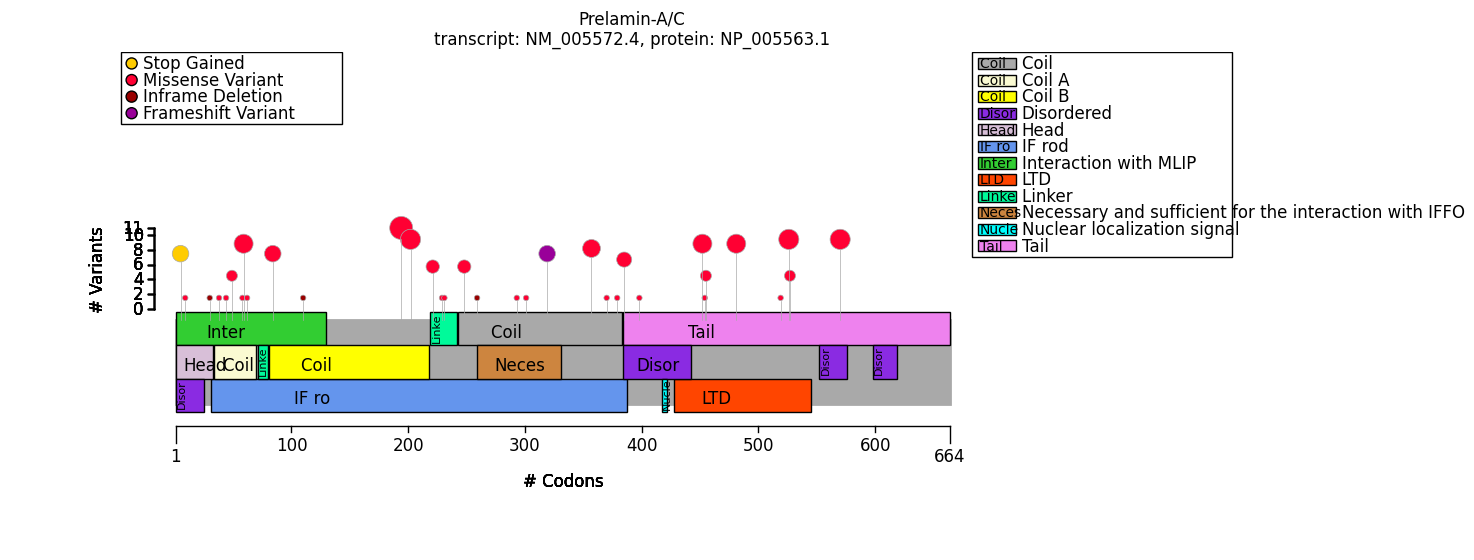

In [29]:
from gpsea.model.genome import GRCh38
from gpsea.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService
from gpsea.view import ProteinVisualizer
import matplotlib.pyplot as plt

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
pms = configure_protein_metadata_service()
tx_coordinates = txc_service.fetch(mane_tx_id)
protein_meta = pms.annotate(mane_protein_id)

fig, ax = plt.subplots(figsize=(15, 8))
visualizer = ProteinVisualizer()
visualizer.draw_protein_diagram(
    tx_coordinates,
    protein_meta,
    cohort,
    ax=ax,
)
fig.tight_layout()
plt.savefig("LMNA.pdf")



Plot variant distribution with respect to the protein sequence, domains, and other features

In [10]:
from gpsea.view import ProteinVariantViewer

pviewer = ProteinVariantViewer(protein_metadata=protein_meta, tx_id=mane_tx_id)
pviewer.process(cohort)


Name,Type,Coordinates,Count,Variants
Interaction with MLIP,REGION,1 - 130,26,p.Glu112del; p.Leu85Arg; p.Tyr45Cys; p.Arg50Pro; p.Lys32del; p.Arg60Gly; p.Ile63Ser; p.Leu59Val; p.Asn39Ser; p.Gln6Ter; p.Thr10Ile
Head,REGION,1 - 33,7,p.Lys32del; p.Thr10Ile; p.Gln6Ter
Disordered,REGION,1 - 25,6,p.Thr10Ile; p.Gln6Ter
IF rod,DOMAIN,31 - 387,67,p.Asn195Lys; p.Gln294Pro; p.Arg50Pro; p.Lys32del; p.Arg60Gly; p.Arg321GlufsTer159; p.Glu203Gly; p.Leu85Arg; p.Leu302Pro; p.Ile63Ser; p.Leu380Ser; p.Gly232Glu; p.Glu112del; p.Tyr45Cys; p.Asp230Asn; p.Arg386Lys; p.Asn39Ser; p.Glu358Lys; p.Arg249Trp; p.Lys261del; p.Arg249Gln; p.Leu59Val; p.Met371Lys; p.His222Pro
Coil 1A,REGION,34 - 70,13,p.Tyr45Cys; p.Arg50Pro; p.Leu59Val; p.Arg60Gly; p.Ile63Ser; p.Asn39Ser
Linker 1,REGION,71 - 80,0,
Coil 1B,REGION,81 - 218,25,p.Leu85Arg; p.Asn195Lys; p.Glu203Gly; p.Glu112del
Linker 2,REGION,219 - 242,5,p.Gly232Glu; p.His222Pro; p.Asp230Asn
Coil 2,REGION,243 - 383,19,p.Arg249Trp; p.Gln294Pro; p.Lys261del; p.Arg249Gln; p.Leu302Pro; p.Met371Lys; p.Glu358Lys; p.Leu380Ser; p.Arg321GlufsTer159
Necessary and sufficient for the interaction with IFFO1,REGION,259 - 331,8,p.Leu302Pro; p.Gln294Pro; p.Arg321GlufsTer159; p.Lys261del


## Allele report

In [11]:
from gpsea.view import CohortVariantViewer

viewer = CohortVariantViewer(tx_id=mane_tx_id)
viewer.process(cohort)


Variant key,Variant (cDNA),Variant (protein),Overlapping Exons,Effects,Count
1_156138613_156138613_C_T,1_156138613_156138613_C_T,None,None,downstream of gene,15
1_156134474_156134474_C_A,c.585C>A,p.Asn195Lys,3,missense,11
1_156137756_156137756_C_A,c.1711C>A,p.Arg571Ser,10,missense,8
1_156137204_156137204_G_C,c.1580G>C,p.Arg527Pro,9,missense,8
1_156134497_156134497_A_G,c.608A>G,p.Glu203Gly,3,missense,8
1_156136984_156136984_C_T,c.1444C>T,p.Arg482Trp,8,missense,7
1_156115096_156115096_C_G,c.178C>G,p.Arg60Gly,1,missense,7
1_156136413_156136413_C_T,c.1357C>T,p.Arg453Trp,7,missense,6
1_156136036_156136036_G_A,c.1072G>A,p.Glu358Lys,6,missense,6
1_156115172_156115172_T_G,c.254T>G,p.Leu85Arg,1,missense,5


# Configure genotype phenotype analysis

## Genotype predicate

Test Missense variants vs. the others.

In [12]:
from gpsea.model import FeatureType
from gpsea.analysis.predicate.phenotype import prepare_predicates_for_terms_of_interest
from gpsea.analysis.pcats.stats import FisherExactTest
from gpsea.analysis.mtc_filter import HpoMtcFilter
from gpsea.analysis.pcats import HpoTermAnalysis

pheno_predicates = prepare_predicates_for_terms_of_interest(
    cohort=cohort,
    hpo=hpo,
)

mtc_filter = HpoMtcFilter.default_filter(hpo=hpo, term_frequency_threshold=0.2)
mtc_correction = 'fdr_bh'
statistic = FisherExactTest()

analysis = HpoTermAnalysis(
    count_statistic=statistic,
    mtc_filter=mtc_filter,
    mtc_correction=mtc_correction,
    mtc_alpha=0.05,
)

In [14]:
from gpsea.model import VariantEffect
from gpsea.analysis.predicate.genotype import VariantPredicates, monoallelic_predicate

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, tx_id=mane_tx_id)
missense_predicate = monoallelic_predicate(
    a_predicate=is_missense,
    b_predicate=~is_missense,
    a_label="missense",
    b_label="other"
)

missense_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=missense_predicate,
    pheno_predicates=pheno_predicates,
)

from gpsea.view import MtcStatsViewer

viewer = MtcStatsViewer()
viewer.process(missense_result)

Code,Reason,Count
HMF01,Skipping term with maximum frequency that was less than threshold 0.2,6
HMF08,Skipping general term,103
HMF09,Skipping term with maximum annotation frequency that was less than threshold 0.4,346


## Summarize the HPO terms

In [15]:
from gpsea.view import summarize_hpo_analysis

summarize_hpo_analysis(hpo=hpo, result=missense_result)

Allele group                                       missense          other  \
                                                      Count Percent  Count   
Lipodystrophy [HP:0009125]                             9/82     11%  16/28   
Elevated circulating creatine kinase concentrat...    26/52     50%    5/5   
Arrhythmia [HP:0011675]                               55/55    100%  11/11   
Abnormal axial skeleton morphology [HP:0009121]       34/34    100%  23/23   
Muscle weakness [HP:0001324]                          45/45    100%  10/10   
Proximal muscle weakness [HP:0003701]                 44/44    100%    9/9   

Allele group                                                                   \
                                                   Percent Corrected p values   
Lipodystrophy [HP:0009125]                             57%           0.000016   
Elevated circulating creatine kinase concentrat...    100%           0.168869   
Arrhythmia [HP:0011675]                               100%           1.000000   
Abnormal axial skeleton morphology [HP:0009121]       100%           1.000000   
Muscle weakness [HP:0001324]                          100%           1.000000   
Proximal muscle weakness [HP:0003701]                 100%           1.000000   

Allele group                                                  
                                                    p values  
Lipodystrophy [HP:0009125]                          0.000003  
Elevated circulating creatine kinase concentrat...  0.056290  
Arrhythmia [HP:0011675]                             1.000000  
Abnormal axial skeleton morphology [HP:0009121]     1.000000  
Muscle weakness [HP:0001324]                        1.000000  
Proximal muscle weakness [HP:0003701]               1.000000

In [16]:
from gpsea.model.genome import Region
upstream_nls = Region(1, 416)
in_upstream_nls = VariantPredicates.region(upstream_nls, mane_tx_id) 

upstream_predicate = monoallelic_predicate(
    a_predicate=in_upstream_nls,
    b_predicate=~in_upstream_nls,
    a_label="NLS Upstream",
    b_label="other"
)
upstream_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=upstream_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=upstream_result)

Allele group                                       NLS Upstream          \
                                                          Count Percent   
Lipodystrophy [HP:0009125]                                 4/63      6%   
Elevated circulating creatine kinase concentrat...        14/32     44%   
Arrhythmia [HP:0011675]                                   50/50    100%   
Abnormal axial skeleton morphology [HP:0009121]           23/23    100%   
Muscle weakness [HP:0001324]                              33/33    100%   
Proximal muscle weakness [HP:0003701]                     32/32    100%   

Allele group                                        other          \
                                                    Count Percent   
Lipodystrophy [HP:0009125]                          21/47     45%   
Elevated circulating creatine kinase concentrat...  17/25     68%   
Arrhythmia [HP:0011675]                             16/16    100%   
Abnormal axial skeleton morphology [HP:0009121]     34/34    100%   
Muscle weakness [HP:0001324]                        22/22    100%   
Proximal muscle weakness [HP:0003701]               21/21    100%   

Allele group                                                           \
                                                   Corrected p values   
Lipodystrophy [HP:0009125]                                   0.000026   
Elevated circulating creatine kinase concentrat...           0.322609   
Arrhythmia [HP:0011675]                                      1.000000   
Abnormal axial skeleton morphology [HP:0009121]              1.000000   
Muscle weakness [HP:0001324]                                 1.000000   
Proximal muscle weakness [HP:0003701]                        1.000000   

Allele group                                                  
                                                    p values  
Lipodystrophy [HP:0009125]                          0.000004  
Elevated circulating creatine kinase concentrat...  0.107536  
Arrhythmia [HP:0011675]                             1.000000  
Abnormal axial skeleton morphology [HP:0009121]     1.000000  
Muscle weakness [HP:0001324]                        1.000000  
Proximal muscle weakness [HP:0003701]               1.000000

In [17]:
cardiac_phenotypes = ("HP:0001644","HP:0005110")

In [18]:
from gpsea.analysis.pscore import CountingPhenotypeScorer
from gpsea.analysis.pscore.stats import MannWhitneyStatistic
from gpsea.analysis.pscore import PhenotypeScoreAnalysis

scorer = CountingPhenotypeScorer.from_query_curies(hpo, cardiac_phenotypes)
score_stats = MannWhitneyStatistic()
score_analysis = PhenotypeScoreAnalysis(score_stats)


In [19]:
score_results = score_analysis.compare_genotype_vs_phenotype_score(cohort, upstream_predicate, scorer)
score_results.pval

0.000997837171503174

AttributeError: 'PolyCountingGenotypePredicate' object has no attribute 'boxplot'

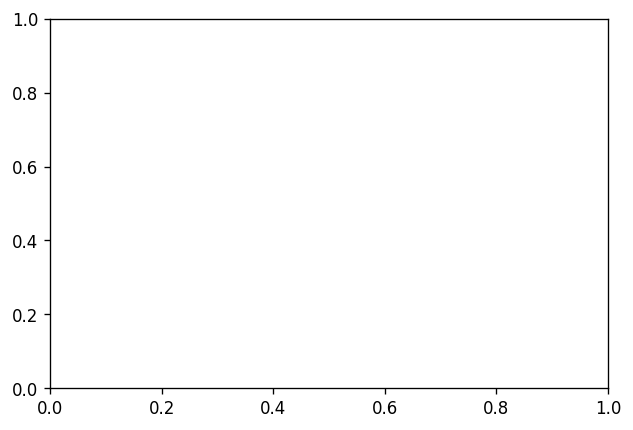

In [ ]:
import matplotlib.pyplot as plt 

fig, ax = plt.subplots(figsize = (6,4), dpi = 120)
score_results.plot_boxplots(upstream_predicate, ax)
_= ax.grid(axis="y")
_= ax.set(ylabel="Phenotype Score", ylim=(-0.5, 2.5))

In [25]:
upstream_tail = Region(1, 383)
in_upstream_tail = VariantPredicates.region(upstream_tail, mane_tx_id) 

upstream_tail_predicate = monoallelic_predicate(
    a_predicate=in_upstream_tail,
    b_predicate=~in_upstream_tail,
    a_label="NLS Upstream",
    b_label="other"
)
upstream_tail_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=upstream_tail_predicate,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo=hpo, result=upstream_tail_result)


Allele group                                       NLS Upstream          \
                                                          Count Percent   
Lipodystrophy [HP:0009125]                                 3/58      5%   
Elevated circulating creatine kinase concentrat...        11/29     38%   
Arrhythmia [HP:0011675]                                   47/47    100%   
Abnormal axial skeleton morphology [HP:0009121]           20/20    100%   
Muscle weakness [HP:0001324]                              29/29    100%   
Proximal muscle weakness [HP:0003701]                     28/28    100%   

Allele group                                        other          \
                                                    Count Percent   
Lipodystrophy [HP:0009125]                          22/52     42%   
Elevated circulating creatine kinase concentrat...  20/28     71%   
Arrhythmia [HP:0011675]                             19/19    100%   
Abnormal axial skeleton morphology [HP:0009121]     37/37    100%   
Muscle weakness [HP:0001324]                        26/26    100%   
Proximal muscle weakness [HP:0003701]               25/25    100%   

Allele group                                                           \
                                                   Corrected p values   
Lipodystrophy [HP:0009125]                                   0.000016   
Elevated circulating creatine kinase concentrat...           0.050130   
Arrhythmia [HP:0011675]                                      1.000000   
Abnormal axial skeleton morphology [HP:0009121]              1.000000   
Muscle weakness [HP:0001324]                                 1.000000   
Proximal muscle weakness [HP:0003701]                        1.000000   

Allele group                                                  
                                                    p values  
Lipodystrophy [HP:0009125]                          0.000003  
Elevated circulating creatine kinase concentrat...  0.016710  
Arrhythmia [HP:0011675]                             1.000000  
Abnormal axial skeleton morphology [HP:0009121]     1.000000  
Muscle weakness [HP:0001324]                        1.000000  
Proximal muscle weakness [HP:0003701]               1.000000

NameError: name 'score_t_results' is not defined

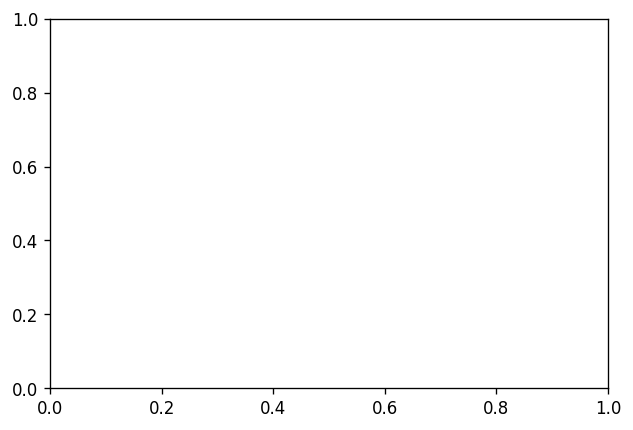

In [26]:
fig, ax = plt.subplots(figsize = (6,4), dpi = 120)
score_t_results.plot_boxplots(gt_upstream_t_predicate, ax)
_= ax.grid(axis="y")
_= ax.set(ylabel="Phenotype Score", ylim=(-0.5, 2.5))

In [28]:
common_variant = VariantPredicates.variant_key('1_156138613_156138613_C_T') 
#                                           	1_156138613_156138613_C_T	None	None
gt_common_var_pred = monoallelic_predicate(
    a_predicate=common_variant,
    b_predicate=~common_variant,
    )
common_var_result = analysis.compare_genotype_vs_phenotypes(
    cohort=cohort,
    gt_predicate=gt_common_var_pred,
    pheno_predicates=pheno_predicates,
)
summarize_hpo_analysis(hpo, common_var_result)

Allele group                                         A              B          \
                                                 Count Percent  Count Percent   
Lipodystrophy [HP:0009125]                       15/15    100%  10/95     11%   
Abnormal axial skeleton morphology [HP:0009121]  15/15    100%  42/42    100%   

Allele group                                                        \
                                                Corrected p values   
Lipodystrophy [HP:0009125]                            5.560251e-12   
Abnormal axial skeleton morphology [HP:0009121]       1.000000e+00   

Allele group                                                   
                                                     p values  
Lipodystrophy [HP:0009125]                       2.780126e-12  
Abnormal axial skeleton morphology [HP:0009121]  1.000000e+00